In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[  1.19646550e+03  -1.10036960e+05   3.95368944e+06  -7.15160100e+07
   7.11005538e+08  -4.09697021e+09   1.38962398e+10  -2.69702529e+10
   2.71813845e+10  -1.07537164e+10]


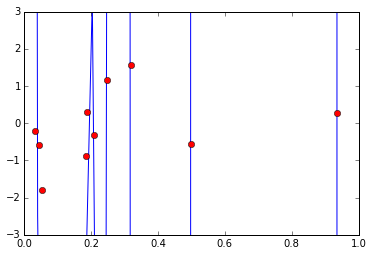

In [5]:
#polynomial example
# normally use np.polyfit...

x = np.random.rand(10)
y = np.random.randn(10)

def xs(x, order):
    return np.asarray([[xi**n for n in range(order)] for xi in x])

A = xs(x, len(x))
c = np.dot(np.linalg.inv(A), y)
print(c)

xg = np.linspace(0, 1, 50)
A = xs(xg, 10)
yg = np.dot(A, c)

plt.plot(xg, yg)
plt.gca().set_ylim(-3, 3)
plt.plot(x, y, 'ro')

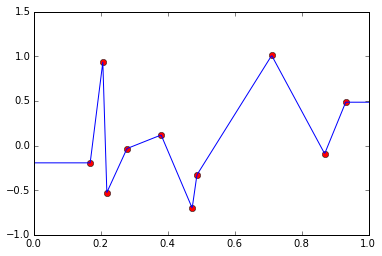

In [6]:
# data
x = np.random.rand(10)
y = np.random.randn(10)

idx = x.argsort()
x = x[idx]
y = y[idx]

# grid
xg = np.linspace(0, 1, 500)

yg = np.interp(xg, x, y)

plt.plot(x, y, 'ro')
plt.plot(xg, yg, '-b')


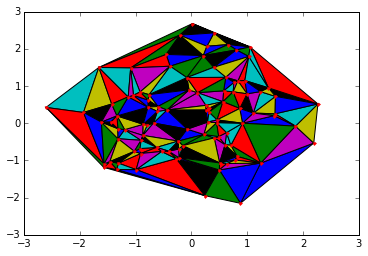

In [7]:
# Delaunay trangulization

from matplotlib import tri

x, y = np.random.randn(2, 100)

t = tri.Triangulation(x, y)

for idx in t.triangles:
    xt = x[idx]
    yt = y[idx]
    plt.fill(xt, yt)

plt.plot(x, y, 'r.')

In [8]:
from scipy import spatial

xy = np.random.randn(1000, 2)
tree = spatial.KDTree(xy)

xy_query = np.random.randn(100, 2)
dist, idx = tree.query(xy_query)


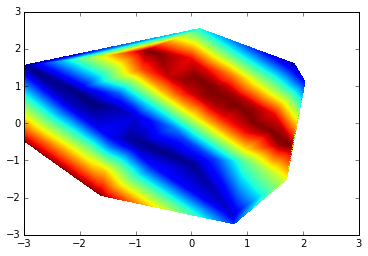

In [14]:
from scipy import interpolate

xy = np.random.randn(100, 2)
x = xy[:, 0]
y = xy[:, 1]
z = np.sin(.4*np.pi*x + .4*np.pi*y)

li = interpolate.LinearNDInterpolator(xy, z)

xg, yg = np.mgrid[-3:3:1000j, -3:3:1000j]
xyg = np.vstack((xg.flatten(), yg.flatten())).T
zg = li(xyg).reshape(xg.shape)
zg = np.ma.masked_where(np.isnan(zg), zg)

plt.pcolormesh(xg, yg, zg)
#plt.plot(x, y, 'r.')


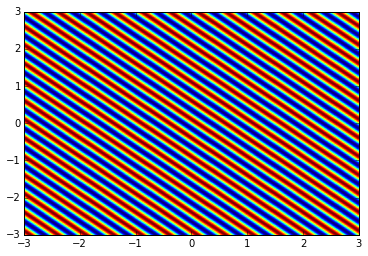

In [10]:
zt = np.sin(4*np.pi*xg + 4*np.pi*yg)
plt.pcolormesh(xg, yg, zt)


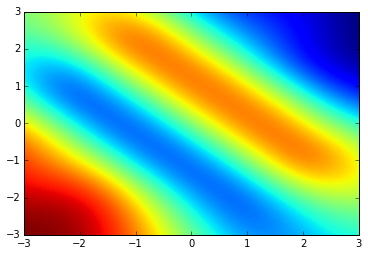

In [15]:
# Radial basis functions
xy = np.random.randn(100, 2)
x = xy[:, 0]
y = xy[:, 1]
z = np.sin(.4*np.pi*x + .4*np.pi*y)

rbfi = interpolate.Rbf(x, y, z)
zg = rbfi(xg, yg)
plt.pcolormesh(xg, yg, zg)